In [1]:
import random
import pandas as pd

def generate_network(num_nodes=10, density=0.3, distance_min=1, distance_max=100, save_csv=True):
    """
    Generates a synthetic dataset of a network with nodes and edges.
    
    Args:
        num_nodos (int): Number of nodes in the network.
        densidad (float): Probability that an edge exists between two nodes (0 to 1).
        distancia_min (int): Minimum distance between nodes.
        distancia_max (int): Maximum distance between nodes.
        guardar_csv (bool): Whether to save the dataset to a CSV file.
    
    Returns:
        pd.DataFrame: DataFrame with the connections between nodes and their costs.
    """
    # List of nodes
    nodes = list(range(num_nodes))
    
    # List to store the edges
    edges = []
    
    # Generate edges with probabilities according to the density
    for origin in nodes:
        for destination in nodes:
            if origin != destination and random.random() < density:
                # Generate a random cost for the edge
                cost = random.randint(distance_min, distance_max)
                edges.append((origin, destination, cost))
    
    # Create a DataFrame to organize the data
    df = pd.DataFrame(edges, columns=['origin', 'destination', 'weight'])
    
    # Save to CSV if necessary
    if save_csv:
        df.to_csv('../data/synthetic/synthetic_network.csv', index=False)
        print("Dataset saved")
    
    return df



In [2]:
import networkx as nx
import matplotlib.pyplot as plt
def visualize_graph(df):
    """
    Visualizes a network represented in a DataFrame as a graph.
    
    The graph is drawn using an automatic layout to improve visualization.
    Nodes are drawn as blue rectangles, edges are drawn as black lines, and
    edge weights are drawn as red labels.
    
    Args:
        df (pd.DataFrame): DataFrame with columns ['origin', 'destination', 'weight'].
    """
    # Verify that df is not None or empty
    if df is None or df.empty:
        raise ValueError("The DataFrame cannot be None or empty")
    
    # Verify that the DataFrame has the necessary columns
    for col in ['origin', 'destination', 'weight']:
        if col not in df.columns:
            raise ValueError(f"The DataFrame must have the column '{col}'")
    
    # Verify that there are no rows with null values
    if df.isnull().any().any():
        raise ValueError("The DataFrame cannot have null values")
    
    # Create a directed graph
    G = nx.DiGraph()
    
    # Add edges and their weights
    G.add_weighted_edges_from(df.values.tolist())
    
    # Get node positions using a layout
    # The 'spring' layout is a good option for networks with a moderate number of nodes
    pos = nx.spring_layout(G)
    
    # Draw nodes and edges
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold')
    
    # Extract weights to label the edges
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='red')
    
    # Show the graph
    plt.title("Network")
    plt.show()
        

Dataset saved


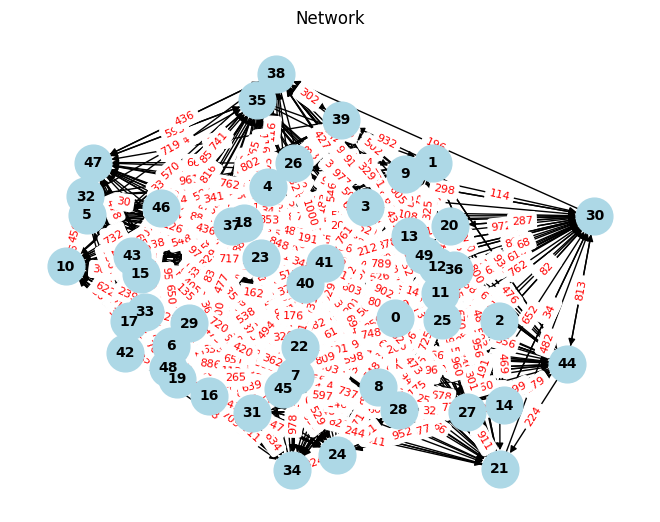

In [5]:
import random
# Generar dataset de ejemplo
dataset = generate_network(num_nodes=50, density=0.4, distance_min=1, distance_max=1000, save_csv=True)

# Visualizar la red
visualize_graph(dataset)